# Learning Objectives

Towards the end of this lesson, you should be able to:
- perform preliminary investigation on dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Read data

In [2]:
# read the csv file

df = pd.read_csv("data.csv")

In [3]:
# check dimensionality

print("Number of rows:", df.shape[0])
print("Number of features/columns:", df.shape[1])

Number of rows: 8523
Number of features/columns: 12


In [4]:
# get the last 5 records

df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# list all the columns in the dataset

df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
# number of columns

len(df.columns)

12

## Checking data types (attribute types)
**It's important to check data types to make sure they are correct. Sometimes a numeric column can be treated as an object type because there are junk text mixed in the data...**

In [7]:
df.dtypes

# we dont know what python magically assign the data types of the data (so we need to check)
# object = string
# present facts and evidence (we, data scientists bench on data/facts)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Try change Outlet_Establishment_Year to float**

In [8]:
# errors="coerce" will make sure any non-numeric will be converted into NaN

# protect from errors
df["Outlet_Establishment_Year"] = pd.to_numeric(df["Outlet_Establishment_Year"], errors = "coerce")

# change it to float
# NaN to float -> that's fine
df["Outlet_Establishment_Year"] = pd.to_numeric(df['Outlet_Establishment_Year'], downcast = 'float')

In [9]:
# check the output of Outlet_Establishment_Year
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987.0,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004.0,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
df["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype(str)

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Missing data
**To check if there is any missing data:**

In [12]:
# check the number of records with NaN

df.isna().sum()

# the impact of this dataset which lacks some data
# it will affect the business
# it will impact the budget of the company
# there's no alignment of shipping if there's small parcels going to big warehouses
# missing value = object exists but missing of the features

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# total up the records with NaN

len(df[df.isna().any(axis=1)])

3873

In [14]:
df2 = pd.read_csv("book1.csv")
df2

,A,B,C,D,E
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [15]:
len(df2[df2.isna().any(axis=1)])

0

In [16]:
df2.dropna()

,A,B,C,D,E
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [17]:
# Remove rows with NaN
df3 = df2.copy()
df3 = df3.dropna()
df3

,A,B,C,D,E
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [18]:
# fill NA with 100

df2 = df2.fillna(100)
df2

# don't simply fill in missing values; just leave it blank
# don't assume things like genders/religion/etc.

,A,B,C,D,E
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


# Removing duplicated Data

In [19]:
df3 = pd.read_csv("book2.csv")

In [20]:
print("Total duplicated rows: ", sum(df3.duplicated()))

# drop duplicates

df3 = df3.drop_duplicates() # or df = df[~df.duplicated()]

Total duplicated rows:  4


# Measuring Central Tendency (Mean, median, mode)

In [21]:
# All in one except "mode", also including quartile range, standard deviation and min max.
df.describe() # by default only returns numeric type columns, use the parameter include="all" to include all dtypes

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [22]:
# To get the mean, median and mode of a feature, you can use pandas .mean() .median() or .mode() function

print("Mean: ", df["Item_Outlet_Sales"].mean())
print("Median: ", df["Item_Outlet_Sales"].median())
print("Mode: ", df["Item_Outlet_Sales"].mode().tolist())

Mean:  2181.288913575032
Median:  1794.331
Mode:  [958.752]


In [23]:
# These measures can also be useful in descriptive analytics, for instance

# Get the mean/average sales in 2009 by item_type
filtered = df[df["Outlet_Establishment_Year"] == 2009.0]
filtered


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [24]:
# Get the mean/average ssales in 2009 by item_type
filtered = df[df["Outlet_Establishment_Year"] == 2009.0]
display(filtered.groupby(["Item_Type"]).agg({"Item_Outlet_Sales": "mean"}))

# Mode can be used to extract the most frequent data
# or you can use df[cal].value_counts() and the first item is the mode

,Item_Outlet_Sales
Item_Type,


# Visualizing distribution of data
**Simple plots can be done fast using pandas .plot(), alternatively seaborn is also quite good**

## Histogram

<AxesSubplot:ylabel='Frequency'>

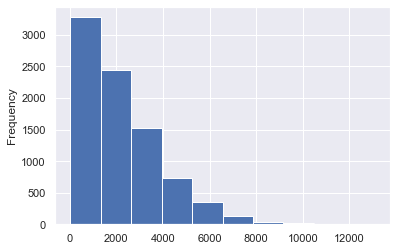

In [25]:
df["Item_Outlet_Sales"].plot(kind="hist", bins = 10)

## Histogram + density plot

<AxesSubplot:>

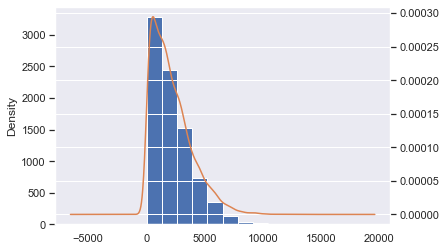

In [26]:
ax = df["Item_Outlet_Sales"].plot(kind="hist")
df["Item_Outlet_Sales"].plot(kind="kde", ax=ax, secondary_y=True)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

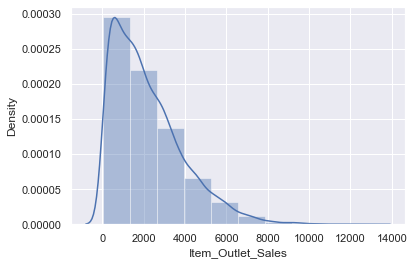

In [27]:
# Use Seaborn for the histogram + density plot

# same output but using seaborn
sns.distplot(df["Item_Outlet_Sales"], bins = 10)

### We can quantify skewness by:

In [28]:
# we can quantify skewness by
print("Skewness: ", df["Item_Outlet_Sales"].skew())

# this shows that this variable is highly skewed to the right (positive)

Skewness:  1.1775306028542796


### Transformation to reduce skewness
- Common transformations are log, square root, or cube root to reduce positive skewness
- If it is negatively skewed, you can use log, cube root or square transformation

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

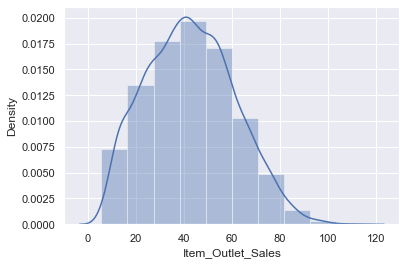

In [29]:
sqrt_transform = np.sqrt(df["Item_Outlet_Sales"])

sns.distplot(sqrt_transform, bins = 10)

## Q-Q Plot / Normality test

In [3]:
!pip install statsmodels

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [30]:
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import normaltest # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

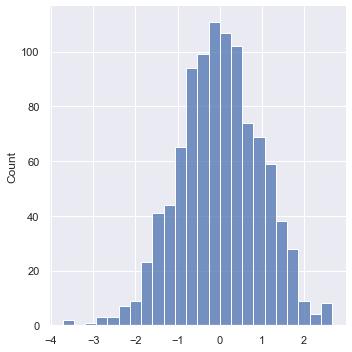

In [31]:
test = np.random.normal(0,1, 1000) # generate random data

# displot
sns.displot(test)

#### QQ plot to visualize normality

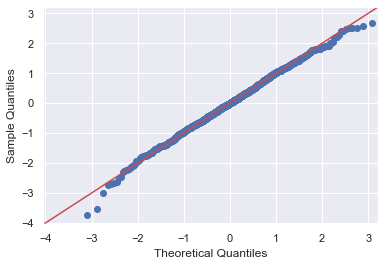

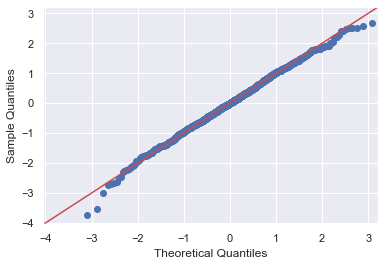

In [32]:
sm.qqplot(test, line = '45')

#### Alternatively, a normality test

In [33]:
# normality test, it's more efficient to do a normality test rather than plot q-q plot for all features in your dataset, especially when your data has a lot features.
k2, p = normaltest(test)
alpha = 1e-3
print("p = {:g}".format(p)) # a big p value means it's close to normal

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

# cannot reject = normally distributed

p = 0.313889
The null hypothesis cannot be rejected


## Bar plot

<AxesSubplot:>

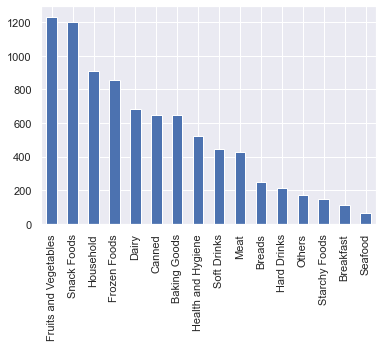

In [34]:
# Plot a bar plot for Item_Type
df["Item_Type"].value_counts().plot(kind='bar')
# using groupby works too: df.groupby("Item_Type").size().sort_value()

## Box Plot

<AxesSubplot:>

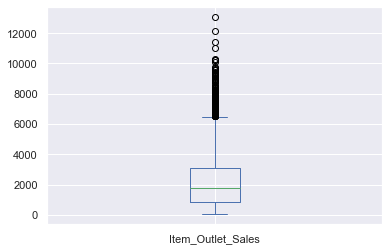

In [35]:
# Plot a boxplot for Item_Outlet_Sales
df[["Item_Outlet_Sales"]].plot(kind='box')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

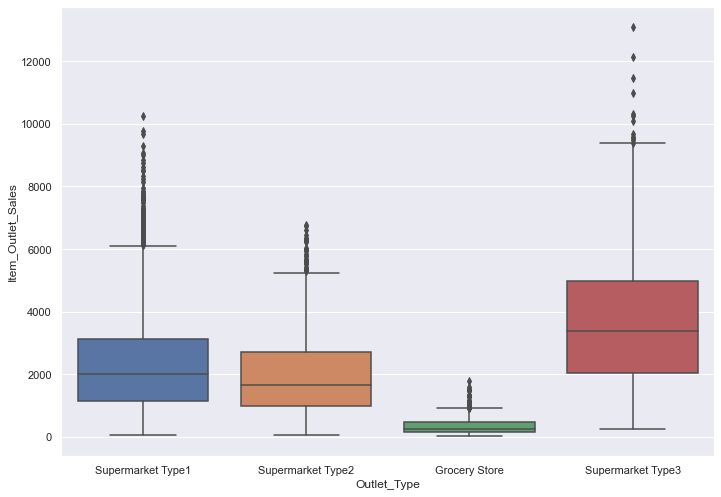

In [36]:
# Plot a boxplot with Outlet_Type as category (x-axis)

fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=ax)

## Correlation plot

<AxesSubplot:>

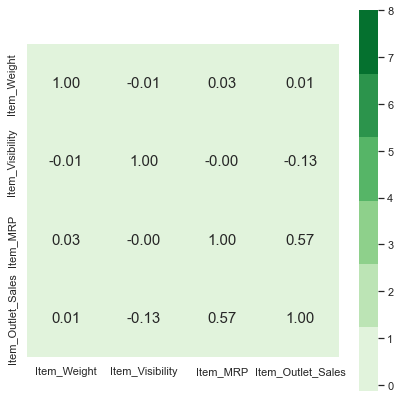

In [37]:
corr = df.corr()

plt.figure(figsize=(7,7))

# Plot a heatmap for df using Seaborn
sns.heatmap(corr, vmax = 8, square = True, annot = True, fmt = '.2f',
           annot_kws = {'size':15}, cmap = sns.color_palette("Greens"))


## Scatterplot


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

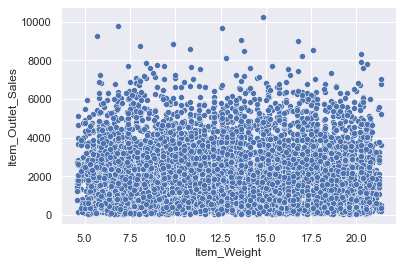

In [38]:
# Plot a scatter plot for Item_Weight vs. Item_Outlet_Sales

sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales", data = df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

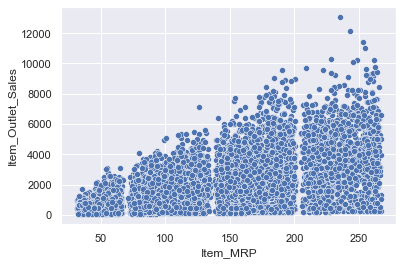

In [39]:
# Plot a scatter plot for Item_MRP vs. Item_Outlet_Sales

sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data = df)